In [1]:
# Import Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import statistics
import fastcluster
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from itertools import permutations
from scipy.spatial.distance import pdist, squareform
from mpl_toolkits.mplot3d import Axes3D

	*Iris-Original : 

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

	*Iris-Scaled : 

   sepal_length  sepal_width  petal_length  petal_width species
0     -0.555556     0.250000     -0.864407    -0.916667  setosa
1     -0.666667    -0.166667     -0.864407    -0.916667  setosa
2     -0.777778     0.000000     -0.898305    -0.916667  setosa
3     -0.833333    -0.083333     -0.830508    -0.916667  setosa
4     -0.611111     0.333333     -0.864407    -0.916667  setosa

*	Samples : 150, Dimensions : 5 
*	Categorical features : 1, 
*	Non-Categorical features : 4


[]

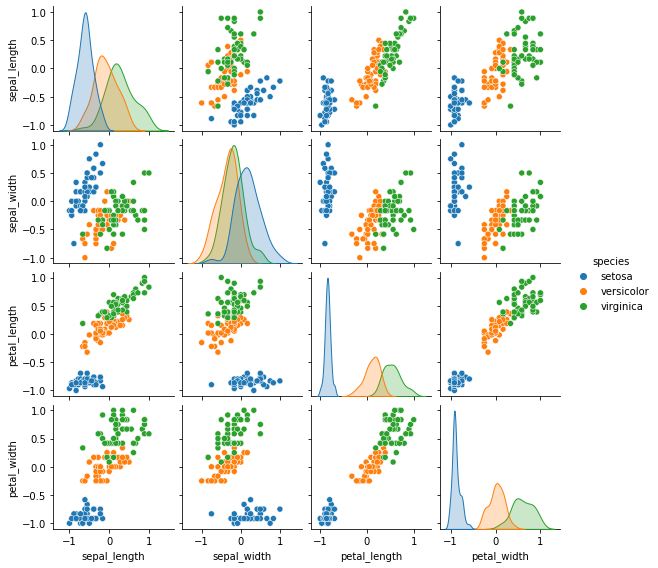

In [2]:
iris = pd.read_csv('iris.csv')
iris_noindex = pd.read_csv('iris.csv', index_col=False)  
print(f'\t*Iris-Original : \n\n{iris.head()}')

# Data Segregation
iris_feature = ['species']
iris_numerical = ['sepal_length', 'sepal_width','petal_length','petal_width']
iris_feature_df = iris[iris_feature]
iris_num_df = iris[iris_numerical]

# Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
x = pd.DataFrame(scaler.fit_transform(iris_num_df))
x.columns = iris_numerical
x_comb = pd.concat([x, iris_feature_df], axis=1)
print(f'\n\t*Iris-Scaled : \n\n{x_comb.head()}')

s_row, s_col = x.shape
print(f'\n*\tSamples : {s_row}, Dimensions : {len(iris.columns)} \n*\tCategorical features : {len(iris_feature)}, \n*\tNon-Categorical features : {len(iris_numerical)}')

sns.pairplot(data=x_comb, hue='species', height=2)
plt.plot()

In [3]:
# Decomposition

# Calculate the co-variance matrix
cov_matrix = np.cov(x.T)

# Don't use SVD for decomposition, use linalg
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Print the sorted eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

eig_vals_total = sum(eigenvalues)
explained_variance = [(i / eig_vals_total)*100 for i in eigenvalues]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)
print('\nExplained variance             : {}'.format(explained_variance))

print('Cumulative explained variance  : {}'.format(cum_explained_variance))

Eigenvalues:
[0.92924671 0.12957115 0.03854911 0.00701349]

Eigenvectors:
[[ 0.4252893  -0.42100611 -0.71434339  0.36276216]
 [-0.14612219 -0.90470509  0.33510219 -0.21877734]
 [ 0.61610511  0.06432645 -0.06825927 -0.78205964]
 [ 0.64667752  0.01116485  0.61054133  0.45708076]]

Explained variance             : [84.14 11.73  3.49  0.64]
Cumulative explained variance  : [ 84.14  95.87  99.36 100.  ]


In [4]:
# Data Transformation.

# Select 'k' no of eigen vectors
k = 2
W = eigenvectors[:, :k] # Projection matrix

# Transform the original dataset
X_proj = x.dot(W)
X_proj_fin = pd.concat([X_proj, iris_feature_df], axis=1)
print('\nNew projection:')
print(X_proj_fin)
#print(X_proj)


New projection:
            0         1    species
0   -1.398156 -0.058123     setosa
1   -1.384526  0.365616     setosa
2   -1.477019  0.259430     setosa
3   -1.446699  0.362572     setosa
4   -1.433960 -0.110126     setosa
..        ...       ...        ...
145  0.966076  0.047010  virginica
146  0.675123  0.509444  virginica
147  0.757152  0.090997  virginica
148  0.841003 -0.133251  virginica
149  0.486725  0.227291  virginica

[150 rows x 3 columns]


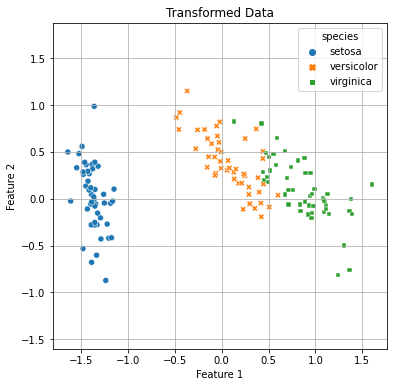

In [5]:
# Calculate the end points of the PC axes (scaled by the square root of the absolute eigenvalues)
pc_endpoints = eigenvectors * np.sqrt(np.abs(eigenvalues))
  
def Original():
    
    # Set the figure size
    plt.figure(figsize=(6, 6))

    df = pd.DataFrame(X_proj_fin)

    # Plot the DataFrame using Seaborn's scatterplot function
    sns.scatterplot(x=X_proj_fin[0], y=X_proj_fin[1],hue = X_proj_fin['species'], style=X_proj_fin['species'], data=df)

    # Show the plot
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Transformed Data')
    plt.grid(True)
    plt.axis('equal')
    plt.show()
    

Original()
#Transformed()

In [6]:
X_proj_1D = X_proj.to_numpy()
#X_proj_1D = X_proj.flatten()[::-1]

# Calculate the condensed distance matrix
condensed_dist_matrix = pdist(X_proj_1D)

# Convert the condensed distance matrix to a square distance matrix
dist_matrix = pd.DataFrame(squareform(condensed_dist_matrix))

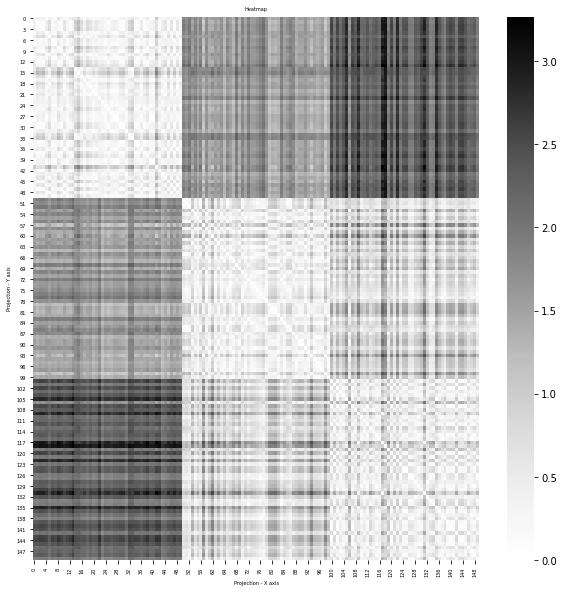

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(dist_matrix, cmap='Greys', annot=False, annot_kws={"size": 10})

title_fontsize = 5
label_fontsize = 5

plt.title('Heatmap', fontsize=title_fontsize)
plt.xlabel('Projection - X axis', fontsize=label_fontsize)
plt.ylabel('Projection - Y axis', fontsize=label_fontsize)

ax = plt.gca()
ax.tick_params(axis='x', labelsize=label_fontsize)
ax.tick_params(axis='y', labelsize=label_fontsize)

plt.show()

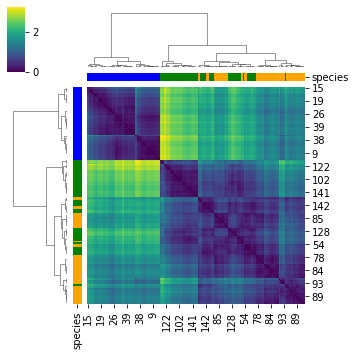

In [18]:
# Create a color mapping based on the species
species_color_mapping = X_proj_fin['species'].map({'setosa': 'blue', 'versicolor': 'orange', 'virginica': 'green'})

# Create a clustermap using the distance matrix and fastcluster with matching colors
linkage_matrix = fastcluster.linkage(condensed_dist_matrix, method='ward')
sns.clustermap(dist_matrix, cmap='viridis', figsize=(5, 5), row_linkage=linkage_matrix, col_linkage=linkage_matrix,
               row_colors=species_color_mapping, col_colors=species_color_mapping)

# Show the plot
plt.show()

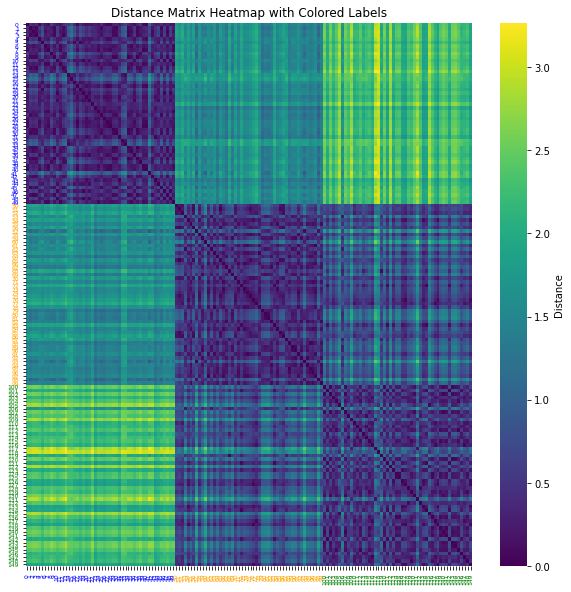

In [9]:
# Create a custom color mapping based on the species
species_color_mapping = X_proj_fin['species'].map({'setosa': 'blue', 'versicolor': 'orange', 'virginica': 'green'})

# Plot the distance matrix heatmap with colored labels
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dist_matrix, cmap='viridis', ax=ax,
            cbar_kws={'label': 'Distance'})

# Set the tick labels and colors
ax.set_xticks(np.arange(dist_matrix.shape[0]) + 0.5)
ax.set_yticks(np.arange(dist_matrix.shape[0]) + 0.5)
ax.set_xticklabels(species_color_mapping.index, rotation=90, fontsize=6)
ax.set_yticklabels(species_color_mapping.index, rotation=0, fontsize=6)

# Color the tick labels
for tick, color in zip(ax.get_xticklabels(), species_color_mapping):
    tick.set_color(color)

for tick, color in zip(ax.get_yticklabels(), species_color_mapping):
    tick.set_color(color)

# Show the plot
plt.title('Distance Matrix Heatmap with Colored Labels')
plt.show()

In [10]:
# Dump to CSV

dist_matrix.to_csv('PCA_MEAN_3_dim.csv', index=False)

In [11]:
# Find the point you need
X_proj_fin.iloc[[45]]['species']

45    setosa
Name: species, dtype: object

In [12]:
X_proj_fin.iloc[[45]]['species']

45    setosa
Name: species, dtype: object

In [13]:
X_proj_fin["species"][55]

'versicolor'

In [14]:
# Load Dataframe for K-nn
knn_df = X_proj_fin

# Select the columns corresponding to the features
features = knn_df[[0, 1]]

# Create a NearestNeighbors object
nbrs = NearestNeighbors(n_neighbors=16, algorithm='ball_tree').fit(features)

# Find the point in the dataset corresponding to point 565
point_in_df = knn_df[knn_df["species"][55] == "versicolor"][[0, 1]]

# Find the 10 nearest neighbors
distances, indices = nbrs.kneighbors(point_in_df)

# Print the ids and point numbers of the 10 nearest neighbors
#neighbors_df = pd.DataFrame(columns=['species'])
#for i in range(1, len(indices[0])):
#    neighbor_index = indices[0][i]
#    neighbor_id = knn_df.loc[neighbor_index, 'species']
#    neighbor_point_no = knn_df.index[neighbor_index]
#    print(f"Neighbor {i}: ID = {neighbor_id}, Point No. = {neighbor_point_no}")
#    neighbors_df = neighbors_df.append({ 'Neighbor': i, 'ID': neighbor_id, 'Point No knn': neighbor_point_no}, ignore_index=True)

# Number of nearest neighbors
#k = 16

# Calculate the k-nearest neighbors from the distance matrix
#nearest_neighbors = dist_matrix.iloc[55].values.argsort()[1:k+1]

# Create a DataFrame with the indices of the k-nearest neighbors
#nearest_neighbors_df = pd.DataFrame(nearest_neighbors, columns=['Point No Dist Matrix'])
#column_to_add = nearest_neighbors_df['Point No Dist Matrix']
#neighbors_df = neighbors_df.join(column_to_add)

# Dump the dataset as a .csv file
#neighbors_df.to_csv('knn_comad_pca_iris.csv', index=False)

NameError: name 'NearestNeighbors' is not defined